# Dimensionality Reduction

- [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)
- [IncrementalPCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA)

In [15]:
import numpy as np
from sklearn import decomposition, datasets
import matplotlib.pyplot as plt
import numpy as np

## Principal Components Analysis (PCA)
In scikit-learn, `PCA` is implemented as a transformer object that learns $n$ components in its fit method, and can be used on new data to project it on these components. The optional parameter `whiten=True` makes it possible to project the data onto the singular space while scaling each component to unit variance.

In [11]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = decomposition.PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum()) 
print(pca.transform(X))

[ 0.99244289  0.00755711]
1.0
[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


### Incremental PCA (IPCA)
IPCA is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. The biggest limitation of PCA is that PCA only supports batch processing, which means all of the data to be processed must fit in main memory. The `IncrementalPCA` object uses a different form of processing and allows for partial computations which almost exactly match the results of PCA while processing the data in a minibatch fashion.

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# IPCA
n_components = 2
ipca = decomposition.IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

# PCA
pca = decomposition.PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

#### Plotting the data

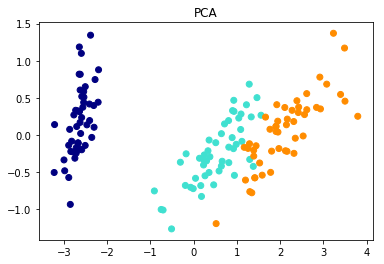

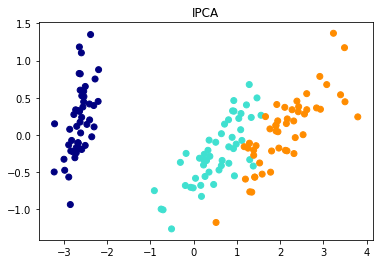

In [28]:
colors = np.array(['navy', 'turquoise', 'darkorange'])
plt.scatter(X_pca[:,0], X_pca[:,1], c = colors[y])
plt.title("PCA")
plt.show()

plt.scatter(X_ipca[:,0], X_ipca[:,1], c = colors[y])
plt.title("IPCA")
plt.show()

We get the same plots from both the procedures.


#### More to be added later